# KMEAN

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [11]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples = 750, centers = centers, cluster_std = 0.4, random_state = 0)
X = StandardScaler().fit_transform(X)

In [12]:
X

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

In [13]:
df = pd.read_excel('/Users/michelfelipepedrazacardenas/Downloads/Data_CHURN.xlsx', sheet_name = "Data")

In [15]:
df.shape

(9999, 208)

In [16]:
features = list(df.columns.drop(['NUMPERIODO','VCHRUCCOMPANIA','FLG_DEAC_M2','CTD_DEACS_M2',
                                    'INGRESO_DEACS_M2']))

In [18]:
features

['VCHREGION',
 'VCHDISTRITO',
 'VCHSCORECREDITICIO',
 'ANT_CLI',
 'ANT_ACTIVA',
 'DIA_VENTA',
 'NUMUNIDSPRE',
 'NUMUNIDS2TERMINAL',
 'NUMUNIDSPOSTSIN2T',
 'NUMIDENSIN2T',
 'NUMBAM',
 'NUMM2M',
 'NUM3GPTTSIN2T',
 'NUM3G',
 'NUMBAFI',
 'NUMLECTURAORIGINALCLARO',
 'NUMLECTURAORIGINALMOVISTAR',
 'CTD_PROD_ENTEL',
 'CTD_PROD_MERC',
 'PENET_ENTEL',
 'PENET_CLARO',
 'PENET_MOVISTAR',
 'VEP',
 'PENALIDAD',
 'MIN_NUMRENTABASICA',
 'MAX_NUMRENTABASICA',
 'AVG_NUMRENTABASICA',
 'SUM_NUMRENTABASICA',
 'MIN_NUMINGRESOTEORICO',
 'MAX_NUMINGRESOTEORICO',
 'AVG_NUMINGRESOTEORICO',
 'SUM_NUMINGRESOTEORICO',
 'PEN_VEP',
 'NUMMINUTOSENTRANTE_7M',
 'NUMMINUTOSALIENTE_7M',
 'NUMMINSALIENTEOFFNET_7M',
 'NUMMINENTRANTEOFFNET_7M',
 'NUMMINSALIENTEONNET_7M',
 'NUMMINENTRANTEONNET_7M',
 'NUMTRAFICOFACEBOOK_7M',
 'NUMTRAFICOWHATSAPP_7M',
 'NUMTRAFICOYOUTUBE_7M',
 'NUMTRAFICOYOUTUBEPAGADO_7M',
 'NUMTRAFICOSPOTIFY_7M',
 'NUMTRAFICOSOUNDCLOUD_7M',
 'NUMTRAFICOAPPLEMUSIC_7M',
 'NUMTRAFICOINSTAGRAM_7M',
 'NUMTRAFICOM

In [19]:
#características numéricas
features_num = list(df[features].select_dtypes(include=[float, int, np.int64, np.float64]).columns)
features_num

['ANT_CLI',
 'ANT_ACTIVA',
 'DIA_VENTA',
 'NUMUNIDSPRE',
 'NUMUNIDS2TERMINAL',
 'NUMUNIDSPOSTSIN2T',
 'NUMIDENSIN2T',
 'NUMBAM',
 'NUMM2M',
 'NUM3GPTTSIN2T',
 'NUM3G',
 'NUMBAFI',
 'NUMLECTURAORIGINALCLARO',
 'NUMLECTURAORIGINALMOVISTAR',
 'CTD_PROD_ENTEL',
 'CTD_PROD_MERC',
 'PENET_ENTEL',
 'PENET_CLARO',
 'PENET_MOVISTAR',
 'VEP',
 'PENALIDAD',
 'MIN_NUMRENTABASICA',
 'MAX_NUMRENTABASICA',
 'AVG_NUMRENTABASICA',
 'SUM_NUMRENTABASICA',
 'MIN_NUMINGRESOTEORICO',
 'MAX_NUMINGRESOTEORICO',
 'AVG_NUMINGRESOTEORICO',
 'SUM_NUMINGRESOTEORICO',
 'PEN_VEP',
 'NUMMINUTOSENTRANTE_7M',
 'NUMMINUTOSALIENTE_7M',
 'NUMMINSALIENTEOFFNET_7M',
 'NUMMINENTRANTEOFFNET_7M',
 'NUMMINSALIENTEONNET_7M',
 'NUMMINENTRANTEONNET_7M',
 'NUMTRAFICOFACEBOOK_7M',
 'NUMTRAFICOWHATSAPP_7M',
 'NUMTRAFICOYOUTUBE_7M',
 'NUMTRAFICOYOUTUBEPAGADO_7M',
 'NUMTRAFICOSPOTIFY_7M',
 'NUMTRAFICOSOUNDCLOUD_7M',
 'NUMTRAFICOAPPLEMUSIC_7M',
 'NUMTRAFICOINSTAGRAM_7M',
 'NUMTRAFICOMAILILIMITADO_7M',
 'NUMTRAFICONETFLIX_7M',
 'NUMTRAFI

In [20]:
df[features_num]

,ANT_CLI,ANT_ACTIVA,DIA_VENTA,NUMUNIDSPRE,NUMUNIDS2TERMINAL,NUMUNIDSPOSTSIN2T,NUMIDENSIN2T,NUMBAM,NUMM2M,NUM3GPTTSIN2T,...,NUMTRAFICOPAGADO_U6M,NUMTRAFICOTOTAL_U6M,U_NUMMINUTOSENTRANTE_U3M,U_NUMMINUTOSALIENTE_U3M,U_NUMMINSALIENTEOFFNET_U3M,U_NUMMINENTRANTEOFFNET_U3M,U_NUMMINSALIENTEONNET_U3M,U_NUMMINENTRANTEONNET_U3M,U_NUMTRAFICOFACEBOOK_U3M,U_NUMTRAFICOWHATSAPP_U3M
0,26.2258,26.1613,27,0,0,3,0,0,0,0,...,78232.847552,89511.081641,117.650000,89.238235,84.489376,84.322517,12.812584,33.327482,1.712867,272.137208
1,166.5806,3.1613,27,1,0,12,0,0,0,0,...,830468.315813,950201.448747,629.885294,730.229412,356.509812,223.880500,373.719600,406.004794,194.930192,2151.306892
2,176.0645,1.5484,31,0,0,39,0,0,0,0,...,390574.310311,452281.958730,1430.050984,2100.218669,1192.424924,671.688476,907.793746,758.755689,225.046418,1031.065128
3,8.0645,7.3871,20,0,0,34,0,1,0,0,...,475397.261585,586872.250817,1002.811765,1454.029412,818.119682,466.384294,635.934243,538.113733,102.746829,898.947768
4,28.1935,22.0323,31,0,0,18,0,0,0,0,...,201845.853703,285086.935699,1423.443691,1751.274478,1003.035470,707.146106,748.239125,716.510362,92.362968,1155.809031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,122.0645,6.0000,1,0,0,2,0,0,0,0,...,30867.538712,36523.198674,274.460833,384.321667,267.985160,174.645260,116.336540,99.815573,149.140893,121.702282
9995,168.0645,34.6774,11,0,0,15,0,1,0,0,...,149795.747355,179015.256062,874.086275,1319.504902,902.506024,553.859894,416.998878,320.226380,75.257677,568.208860
9996,28.7097,28.6774,11,0,0,10,0,2,0,0,...,141644.587820,151935.540039,139.716671,173.470588,179.162753,97.839288,50.298029,41.877382,3.583887,167.281278
9997,165.0968,9.1613,27,0,0,10,0,0,0,0,...,175434.237605,203321.844795,274.501190,936.435714,585.381043,204.839721,355.940386,69.832921,284.231151,903.155346


In [12]:
# vacios
nulos = pd.DataFrame(df[features_num].isnull().sum(), columns = ['cantidad'])
nulos.head()

,cantidad
ANT_CLI,0
ANT_ACTIVA,0
DIA_VENTA,0
NUMUNIDSPRE,0
NUMUNIDS2TERMINAL,0


In [15]:
# reemplazar por cero los NAs
features_na = (nulos[nulos['cantidad']>0].sort_values('cantidad',ascending=False)/df.shape[0]*100).index.values
features_na

array(['PENALIDAD', 'MIN_NUMINGRESOTEORICO', 'MAX_NUMINGRESOTEORICO',
       'AVG_NUMINGRESOTEORICO', 'SUM_NUMINGRESOTEORICO',
       'NUMTRAFICOYOUTUBEPAGADO_U6M', 'NUMTRAFICOYOUTUBEPAGADO_U3M'],
      dtype=object)

In [16]:
nulos_num = list(df[features_na].select_dtypes(include=[int,float,np.int64,np.float64]).columns)
nulos_num

['PENALIDAD',
 'MIN_NUMINGRESOTEORICO',
 'MAX_NUMINGRESOTEORICO',
 'AVG_NUMINGRESOTEORICO',
 'SUM_NUMINGRESOTEORICO',
 'NUMTRAFICOYOUTUBEPAGADO_U6M',
 'NUMTRAFICOYOUTUBEPAGADO_U3M']

In [17]:
df[nulos_num] = df[nulos_num].fillna(0)

In [19]:
df_scala = StandardScaler().fit_transform(df[features_num])

In [20]:
df_scala

array([[-0.79363315,  0.76136512,  0.56053013, ..., -0.94803055,
        -0.53839985, -0.62774977],
       [ 0.85391293, -0.83985643,  0.56053013, ..., -0.08147576,
         0.28457147,  0.76580542],
       [ 0.9652391 , -0.95214383,  1.04994165, ...,  0.73874583,
         0.41284563, -0.06494378],
       ...,
       [-0.76447604,  0.93653179, -1.39711596, ..., -0.9281502 ,
        -0.5304306 , -0.70550886],
       [ 0.83649543, -0.42214646,  0.56053013, ..., -0.86314756,
         0.6649314 , -0.15979916],
       [ 1.28293404,  1.55635769, -1.03005732, ..., -0.80936821,
        -0.52274297, -0.65961374]])

Text(0.5, 1.0, 'Incorrecto NUMERO DE CLUSTERS')

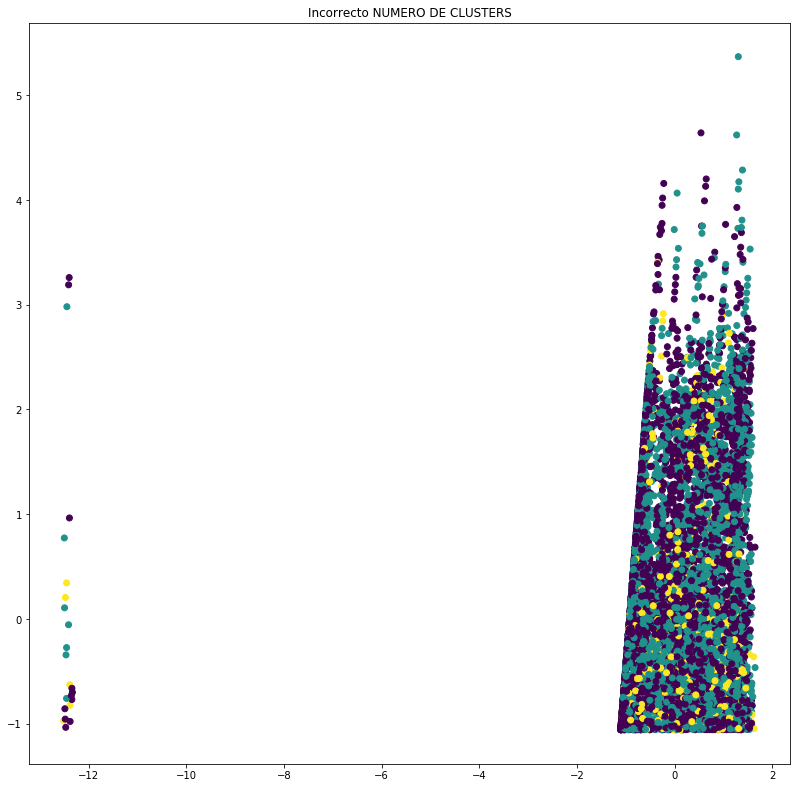

In [21]:
# Incorrect number of clusters
y_pred = KMeans(n_clusters = 3, random_state=170).fit_predict(df_scala)

plt.figure(figsize=(30, 30))
plt.subplot(221)
plt.scatter(df_scala[:, 0], df_scala[:, 1], c=y_pred)
plt.title("Incorrecto NUMERO DE CLUSTERS")


# DBSCAN

In [58]:
df_scala.shape

(9999, 200)

In [22]:
# Computar DBSCAN
db = DBSCAN(eps=10, min_samples=6).fit(df_scala) # PROBAR CON 7 Y 0.15
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Número de grupos en las etiquetas, ignorando el ruido si está presente.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [32]:
n_clusters_

4

In [33]:
labels_true.shape

(750,)

In [34]:
labels.shape

(9999,)

In [35]:
# Plot resultado
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 750 but corresponding boolean dimension is 9999

<Figure size 1440x1440 with 0 Axes>

# JERARQUICO

In [36]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [37]:
clustering = AgglomerativeClustering().fit(df_scala)
clustering 
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, 
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [38]:
clustering.labels_

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

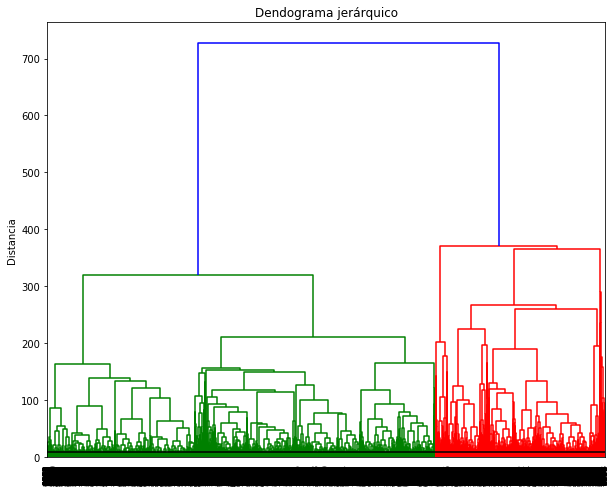

In [39]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

Z = linkage(df_scala, 'ward')

plt.figure(figsize=(10, 8))
plt.title('Dendograma jerárquico')
plt.ylabel('Distancia')
max_d = 10
dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,  
        show_contracted=True
    )
plt.axhline(y=max_d, c='k')
plt.show()

In [25]:
>>> pairs = [(1, 'a'), (2, 'b'), (3, 'c')]
>>> sum(x for x, _ in pairs)
6

6

In [29]:
>>> pairs = [(1, 'a'), (2, 'b'), (3, 'c')]
>>> sum(x[2] for x in pairs)


IndexError: tuple index out of range

In [37]:
>>> full_name = lambda first, last: f'Full name: {first.title()} {last.title()}'
>>> full_name('guido', 'van rossum')

'Full name: Guido Van Rossum'

In [61]:
# Defining a decorator

def trace(f):

    def wrap(*args, **kwargs):

        print(f"[TRACE] func: {f.__name__}, args: {args}, kwargs: {kwargs}")

        return f(*args, **kwargs)


    return wrap
# Applying decorator to a function

@trace

def add_two(x):
    return x + 2


# Calling the decorated function

add_two(4)


# Applying decorator to a lambda

print((trace(lambda x: x ** 2))(3))


[TRACE] func: {f.__name__}, args: {args}, kwargs: {kwargs}
[TRACE] func: {f.__name__}, args: {args}, kwargs: {kwargs}
9


In [89]:
import shapefile


In [90]:
shape = shapefile.Reader("/Users/michelfelipepedrazacardenas/Downloads/cartodb-query/prueba.shp")


In [91]:
shape

In [96]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shp.Reader("/Users/michelfelipepedrazacardenas/Downloads/cartodb-query/prueba.shp")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

ShapefileException: Shapefile Reader requires a shapefile or file-like object. (no dbf file found)

<Figure size 432x288 with 0 Axes>

In [101]:
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
    


ShapefileException: Shapefile Reader requires a shapefile or file-like object. (no dbf file found)

In [97]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shp.Reader("/Users/michelfelipepedrazacardenas/Downloads/cartodb-query/prueba.shp")


In [98]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

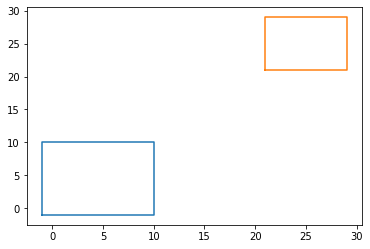

In [102]:
import numpy as np
from matplotlib import pyplot as p  #contains both numpy and pyplot
x1 = [-1,-1,10,10,-1]; y1 = [-1,10,10,-1,-1]
x2 = [21,21,29,29,21]; y2 = [21,29,29,21,21]
shapes = [[x1,y1],[x2,y2]]
for shape in shapes:
    x,y = shape
    p.plot(x,y)
p.show()

In [108]:
####CATASTRO

In [ ]:
import geopandas as gpd

In [109]:
import matplotlib.pyplot as plt

In [116]:
zipfile = "zip:///Users/michelfelipepedrazacardenas/Downloads/cartodb.zip"
gdf=gpd.read_file(zipfile)

In [117]:
print(gdf.shape)

(149, 8)


In [118]:
print(gdf.head)

<bound method NDFrame.head of      cartodb_id                 name             estacion    valid_ante  \
0             1          LA DESPENSA          LA DESPENSA    573.555556   
1             2                 BOSA                 BOSA   1090.777778   
2             3            LEON XIII            LEON XIII   2715.333333   
3             4  TERRERO-HOSPITAL CV  TERRERO-HOSPITAL CV   5630.222222   
4             5            SAN MATEO            SAN MATEO  11390.222220   
..          ...                  ...                  ...           ...   
144         145    Guatoque-Veraguas    Guatoque-Veraguas    409.555556   
145         146       Tygua-San José       Tygua-San José    396.333333   
146         147             Terminal             Terminal   2161.333333   
147         148            Calle 187            Calle 187   1629.666667   
148         149             Calle 26             Calle 26   3203.555556   

     valid_cuar  nivel_ocup                         estacion_c  \
0  

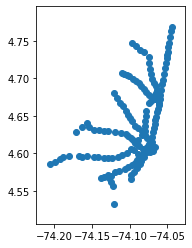

In [121]:
gdf.plot()


In [122]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [123]:
gdf.shape

(149, 8)

In [124]:
gdf

,cartodb_id,name,estacion,valid_ante,valid_cuar,nivel_ocup,estacion_c,geometry
0,1,LA DESPENSA,LA DESPENSA,573.555556,909,1.584851,(07506) DESPENSA,POINT (-74.18827 4.59455)
1,2,BOSA,BOSA,1090.777778,1616,1.481512,(07010) Bosa,POINT (-74.18115 4.59689)
2,3,LEON XIII,LEON XIII,2715.333333,2590,0.953990,(07505) LEON XIII,POINT (-74.19319 4.59216)
3,4,TERRERO-HOSPITAL CV,TERRERO-HOSPITAL CV,5630.222222,5902,1.048342,(07504) TERREROS,POINT (-74.19919 4.58915)
4,5,SAN MATEO,SAN MATEO,11390.222220,11367,0.997961,(07503) SAN MATEO,POINT (-74.20593 4.58579)
...,...,...,...,...,...,...,...,...
144,145,Guatoque-Veraguas,Guatoque-Veraguas,409.555556,491,1.198861,(07201) Guatoque -Veraguas,POINT (-74.09470 4.60394)
145,146,Tygua-San José,Tygua-San José,396.333333,899,2.267283,(07200) Tygua-San José,POINT (-74.08872 4.59967)
146,147,Terminal,Terminal,2161.333333,864,0.399753,(02502) Terminal,POINT (-74.04358 4.76874)
147,148,Calle 187,Calle 187,1629.666667,863,0.529556,(02001) Centro Comercial Santa Fe,POINT (-74.04441 4.76342)


In [137]:
gdf['Discounted_Price'] =gdf['estacion_c']

In [166]:
new = gdf["estacion_c"].str.split(" ", n = 1, expand = True)

In [167]:
new

,0,1
0,(07506),DESPENSA
1,(07010),Bosa
2,(07505),LEON XIII
3,(07504),TERREROS
4,(07503),SAN MATEO
...,...,...
144,(07201),Guatoque -Veraguas
145,(07200),Tygua-San José
146,(02502),Terminal
147,(02001),Centro Comercial Santa Fe


In [169]:
new.drop(columns =[0], inplace = True)

In [170]:
new

,1
0,DESPENSA
1,Bosa
2,LEON XIII
3,TERREROS
4,SAN MATEO
...,...
144,Guatoque -Veraguas
145,Tygua-San José
146,Terminal
147,Centro Comercial Santa Fe
